C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_7936\50622511.py:8: DtypeWarning: Columns (23,44,54) have mixed types. Specify dtype option on import or set low_memory=False.
  matched_df = pd.read_csv(csv_path)


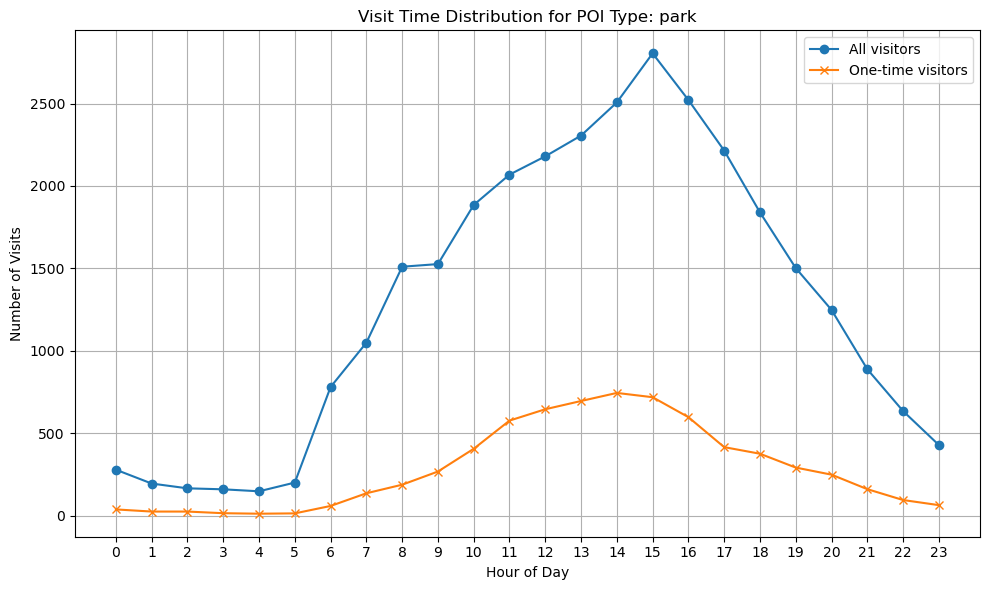

In [1]:
# visit once == 1 tourists

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV file into a DataFrame
csv_path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\matched_data_100.csv"
matched_df = pd.read_csv(csv_path)
matched_df["datetime"] = pd.to_datetime(matched_df["datetime"], errors='coerce', utc=True)
matched_df["datetime"] = matched_df["datetime"].dt.tz_convert("Pacific/Auckland")  # Convert to Auckland timezone

# 2. Choose POI type == Park
target_poi_type = "park"
df_filtered = matched_df[matched_df["leisure"] == target_poi_type].copy()

# 3. get visits per hour
df_filtered["hour"] = df_filtered["datetime"].dt.hour

# 4. Count all visits per hour
all_visits = df_filtered.groupby("hour").size().reset_index(name="count_all")

# 5. Count visits by user and POI
visit_counts = df_filtered.groupby(["uid", "id"]).size().reset_index(name="visit_times")

# 6. Identify one-time visitors
one_time_visits = visit_counts[visit_counts["visit_times"] == 1]

# 7. Merge one-time visits with the original DataFrame to get their visit times
df_one_time = df_filtered.merge(one_time_visits[["uid", "id"]], on=["uid", "id"], how="inner")

# 8. One-time visitors' time distribution
one_time_by_hour = df_one_time.groupby("hour").size().reset_index(name="count_one_time")

# 9. Merge the two visit data
time_dist = pd.merge(all_visits, one_time_by_hour, on="hour", how="left").fillna(0)

# 10. plot the distribution
plt.figure(figsize=(10,6))
plt.plot(time_dist["hour"], time_dist["count_all"], label="All visitors", marker='o')
plt.plot(time_dist["hour"], time_dist["count_one_time"], label="One-time visitors", marker='x')
plt.title(f"Visit Time Distribution for POI Type: {target_poi_type}")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Visits")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_7936\1897409285.py:8: DtypeWarning: Columns (23,44,54) have mixed types. Specify dtype option on import or set low_memory=False.
  matched_df = pd.read_csv(csv_path)


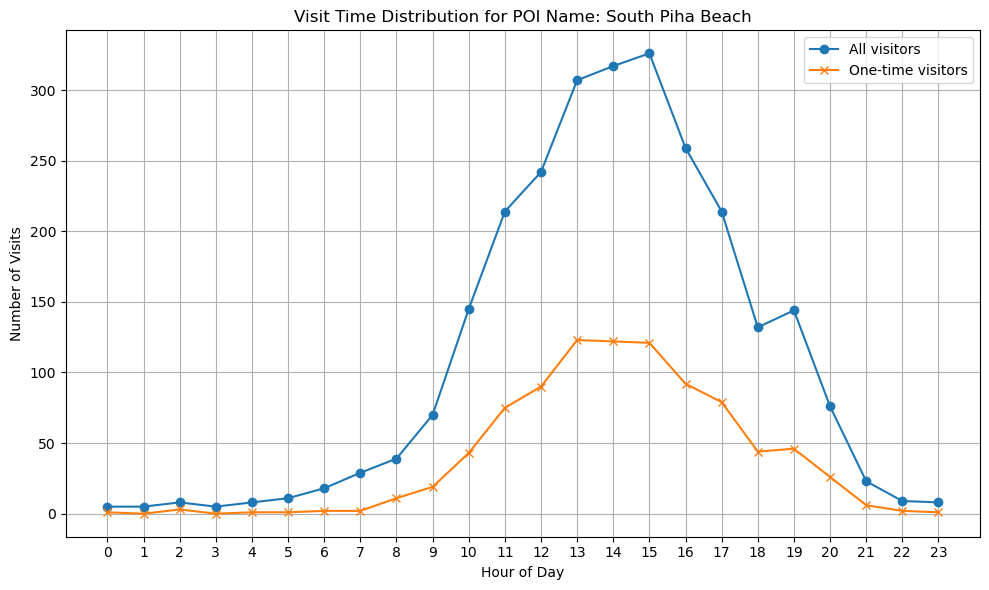

In [2]:
#visit once == 1 tourists

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV file into a DataFrame
csv_path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\matched_data_100.csv"
matched_df = pd.read_csv(csv_path)
matched_df["datetime"] = pd.to_datetime(matched_df["datetime"], errors='coerce', utc=True)
matched_df["datetime"] = matched_df["datetime"].dt.tz_convert("Pacific/Auckland")  # Convert to Auckland timezone

# 2. Filter rows where the POI name is exactly 
target_name = "South Piha Beach"
df_filtered = matched_df[matched_df["name"] == target_name].copy()

# 3. Extract hour of visit
df_filtered["hour"] = df_filtered["datetime"].dt.hour

# 4. Count all visits per hour
all_visits = df_filtered.groupby("hour").size().reset_index(name="count_all")

# 5. Count number of visits per (user, poi) pair
visit_counts = df_filtered.groupby(["uid", "id"]).size().reset_index(name="visit_times")

# 6. Identify one-time visitors
one_time_visits = visit_counts[visit_counts["visit_times"] == 1]

# 7. Filter to keep only one-time visitor visits
df_one_time = df_filtered.merge(one_time_visits[["uid", "id"]], on=["uid", "id"], how="inner")

# 8. Count one-time visitor visits per hour
one_time_by_hour = df_one_time.groupby("hour").size().reset_index(name="count_one_time")

# 9. Merge the two time distributions
time_dist = pd.merge(all_visits, one_time_by_hour, on="hour", how="left").fillna(0)

# 10. Plot
plt.figure(figsize=(10,6))
plt.plot(time_dist["hour"], time_dist["count_all"], label="All visitors", marker='o')
plt.plot(time_dist["hour"], time_dist["count_one_time"], label="One-time visitors", marker='x')
plt.title(f"Visit Time Distribution for POI Name: {target_name}")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Visits")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
